In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 20 14:19:25 2022

@author: Mouctar DIALLO
"""

import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import copy

matrix_cout = [
    [0, 12, 13, 15, 23, 25, 56, 27, 38, 29, 60, 32],
    [12, 0, 23, 22, 34, 56, 24, 78, 79, 34, 23, 24],
    [13, 23, 0, 25, 23, 19, 18, 42, 25, 23, 26, 33],
    [15, 22, 25, 0, 12, 24, 38, 27, 38, 49, 69, 29],
    [23, 34, 23, 12, 0, 54, 36, 71, 81, 19, 100, 22],
    [25, 56, 19, 24, 54, 0, 16, 27, 26, 37, 105, 72],
    [56, 24, 18, 38, 36, 16, 0, 18, 23, 24, 25, 26],
    [27, 78, 42, 27, 71, 27, 18, 0, 18, 19, 30, 53],
    [38, 79, 25, 38, 81, 26, 23, 18, 0, 29, 23, 22],
    [29, 34, 23, 49, 19, 37, 24, 19, 29, 0, 22, 42],
    [60, 23, 26, 69, 100, 105, 25, 30, 23, 22, 0, 36],
    [32, 24, 33, 29, 22, 72, 26, 53, 22, 42, 36, 0]
]

# Nombre de points (Villes)

N = len(matrix_cout)

print('Nombre de ville: ', N)

# Nombre de déplacements à effectuer avant de mettre à jour la liste tabou
max_deplacement = 100

# Nombre maximum d'itérations de l'algorithme
MAX_ITERATIONS = 1000

# Liste tabou qui stocke les déplacements interdits
liste_tabou = []

# Fonction qui calcule la distance totale d'un itinéraire donné
def distance_totale(route, matrix_cout):
  distance = 0
  if len(route) > 1:
    for i in range(len(route)):
      ville_a_idx = route[i]
      ville_b_idx = route[(i+1) % N]
      distance += matrix_cout[ville_a_idx][ville_b_idx]
  return distance


# Fonction qui génère un voisinage à partir d'un itinéraire donné
def generateur_voisinage(route):
  voisinage = []
  for i in range(N):
    for j in range(N):
      if i == j:
        continue
      nouvelle_route = copy.copy(route)
      nouvelle_route[i], nouvelle_route[j] = nouvelle_route[j], nouvelle_route[i]
      voisinage.append(nouvelle_route)
  return voisinage

# la fonction qui met à jour la liste tabou
def update_liste_tabou(deplacement):
  liste_tabou.append(deplacement)
  if len(liste_tabou) > max_deplacement:
    liste_tabou.pop(0)

# Fonction qui vérifie si un déplacement est interdit par la liste tabou
def is_tabu(deplacement):
  return deplacement in liste_tabou

def search(matrix_cout, N, max_deplacement, MAX_ITERATIONS):
  # Génère un itinéraire de départ aléatoire
  #route_actuelle = [6, 10, 8, 11, 1, 2, 0, 3, 4, 9, 7, 5]
  route_actuelle = list(range(N))
  #Mélanger la liste (réorganiser l'ordre des éléments de la liste)
  random.shuffle(route_actuelle)

  # Calcul de la distance de l'itinéraire de départ
  distance_actuelle = distance_totale(route_actuelle, matrix_cout)

  # Boucle jusqu'à ce que l'on trouve un itinéraire optimal ou qu'on atteigne le nombre maximum d'itérations
  for i in range(MAX_ITERATIONS):
    # Génère un voisinage à partir de l'itinéraire courant
    voisinage = generateur_voisinage(route_actuelle)
    
    # Initialise les variables meilleur_route et best_distance avec des valeurs par défaut
    meilleur_route = None
    best_distance = float('inf')
    # Choisit le meilleur itinéraire du voisinage qui n'est pas interdit par la liste tabou
    for j in range(len(voisinage)):
      nouvelle_route = voisinage[j]
      if is_tabu(nouvelle_route):
        continue
      new_distance = distance_totale(nouvelle_route, matrix_cout)
      if new_distance < best_distance:
        meilleur_route = nouvelle_route
        best_distance = new_distance

    # Met à jour la liste tabou et l'itinéraire courant
    update_liste_tabou(meilleur_route)
    route_actuelle = meilleur_route
    distance_actuelle = best_distance

  return route_actuelle

# Appelle la fonction de recherche tabou
meilleur_route = search(matrix_cout, N, max_deplacement, MAX_ITERATIONS)

# Affiche le résultat
print("Meilleur itinéraire trouvé :", meilleur_route)
print("Distance totale :", distance_totale(meilleur_route, matrix_cout))



Nombre de ville:  12
Meilleur itinéraire trouvé : [7, 9, 4, 3, 0, 1, 11, 8, 2, 5, 6, 10]
Distance totale : 238


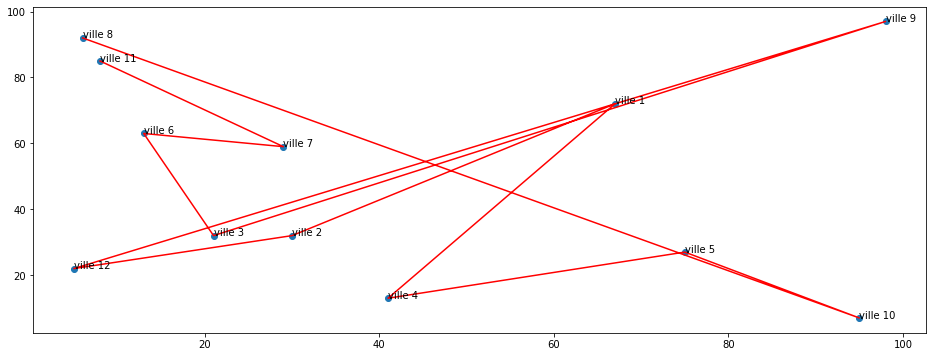

In [2]:


# Génération aléatoire des noms de chaque ville
villes = [f'ville {i+1}' for i in range(N)]


# Génération aléatoire des coordonnées x et y de chaque ville
coords = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(N)]



# Récupérez les coordonnées des villes à partir de la matrice de distance
# (ici, nous supposons que chaque ville a des coordonnées x et y)
x = [coord[0] for coord in coords]
y = [coord[1] for coord in coords]

# Créez un nouveau graphique et affichez les points correspondant aux villes
plt.figure(figsize=(16, 6))
plt.scatter(x, y)

# Ajoutez des étiquettes sur chaque point (ici, nous utilisons les noms des villes)
for i, ville in enumerate(villes):
    plt.annotate(ville, (x[i], y[i]))

# Affichez le graphique

# Créez une liste de tuples (x, y) qui contient les coordonnées de chaque ville
# dans l'ordre de l'itinéraire courant
route_coords = [(x[ville], y[ville]) for ville in meilleur_route]

# Créez un nouveau graphique et tracez une ligne entre chaque ville


plt.plot(*zip(*route_coords), color="red")


# Affichez le graphique
plt.show()